<a href="https://colab.research.google.com/github/gonzH/reconhecimento-de-padroes-2025-2/blob/main/copia_trabalho01_consolidacao_do_conteudo_rec_padrao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rec. de Padrões - Trabalho 01 - Consolidação do Conteúdo

---

In [ ]:
# @title Prencha suas informações: { display-mode: "form" }

nome_completo = 'Hellesandro Gonzaga de Carvalho'  # @param {type: "string"}
matricula     = '20251MCPA0110'  # @param {type: "string"}

data = '2025-11-26'  # @param {type: "date"}
# @markdown ---

---

### **1) Contextualização do Dataset**

#### **1.1) Introdução**

Dataset escolhido: **[Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)**

O dataset Mushroom Classification contém informações sobre cogumelos coletados pela Audubon Society Field Guide.
O objetivo é prever se um cogumelo é comestível ou venenoso, com base nas características coletadas.

In [ ]:
# Install dependencies
!pip install kagglehub[pandas-datasets]

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "mushrooms.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/mushroom-classification",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



/tmp/ipython-input-1055049817.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 365k/365k [00:00<00:00, 395kB/s]


In [ ]:
# imports
import pandas as pd

#### **1.2) Exploração Inicial**

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Através do `head()`, `info()` e `describe()`, podemos observar que:


*   São 23 atributos, deles 22 features + 1 target, todas aparentam ser categóricas;
*   São 8124 registros, e todos eles estão devidamente preenchidos;
*   Nosso target é a coluna `class`, contendo apenas dois valores únicos `e` e `p`, respectivamente comestível e venenoso;
*   O dataset está balanceado.


### 2) Preparação dos Dados



#### 2.1) Tratamento de Dados Faltantes

Não será necessário pois o dataset não apresenta tal problema. Veja a confirmação abaixo:

In [ ]:
# Confirming that there is no null in the data
df.isna().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


#### 2.2) Normalização/Padronização
Não é necessário para modelos baseados em árvore de decisão.

Vamos começar a preparação dos dados:

In [ ]:
'''
Label Encoding

Converter os atributos categóricos em números para utilizar
em modelos baseados em árvores.
'''
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


#### 2.3) Tratamento de itens descobertos em outras etapas

In [ ]:
# Drop useless column
df.drop("veil-type", axis=1, inplace=True)


#### 2.4) Divisão dos Dados


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("class", axis=1) # only features
y = df_encoded["class"] # just the target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### 3) Exploração e Visualização dos Dados

#### 3.1) Visualizações

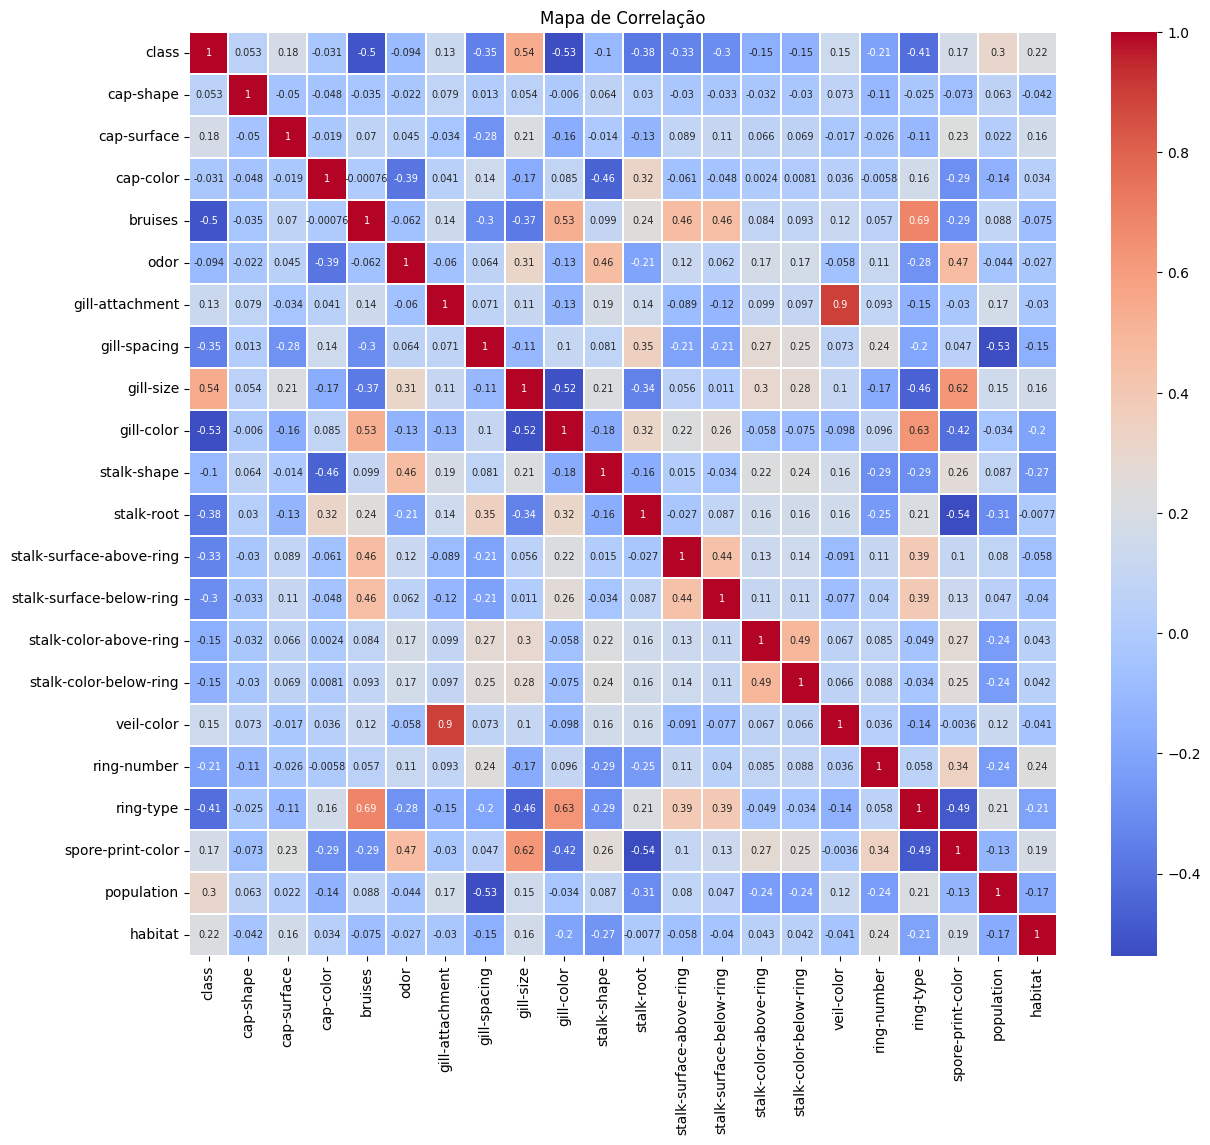

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
sns.heatmap(df_encoded.corr(), linewidths=.1, cmap="coolwarm", annot=True, annot_kws={"size": 7})
plt.title("Mapa de Correlação")
plt.show()


Vejamos:

*   `veil-type` não tem correlação alguma com as demais features, provavelmente uma constante;
*   Poucas correlações realmente positivas ou negativas; as cores não estão muito fortes;
*   Destaque para as features: `bruises`, `gill-spacing`, `gill-size`, `gill-color`, `stalk-root`, `stalk-surface-above-ring`, `stalk-surface-below-ring`, e `ring-type`.

In [ ]:
'''
Ferramenta para apoiar a leitura visual da matriz de correlação.
'''
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Mushroom Classification Report", explorative=True)
profile.to_file(output_file="Report_Mushroom_class.html")
profile

*   O target está balanceado com 51.8% comestível e 42.2% venenoso;
*   `veil-type` é de fato uma constante;
*   Diversas altas correlações identificadas, inclusive citadas a partir da matriz de correlação anterior. Aqui não dá para saber qual método de correlação foi utilisado então a cautela deve ser mantida;
*   3 das 22 features estão bastante desbalanceadas: `gill-attachment`, `veil-color`, `ring-number`. Atenção ao utilizar elas;
* `stalk-root` tem um ~30% dos valores preenchidos com "?"; Não encontrei nada indicando esse simbolo como nulo ou "desconhecido", vou manter mas ficar atento a essa feature.

Vamos resolver alguns detalhes que faltaram na etapa anterior de preparação, veja o tópico 2.3.

#### 3.2) Análise de Features

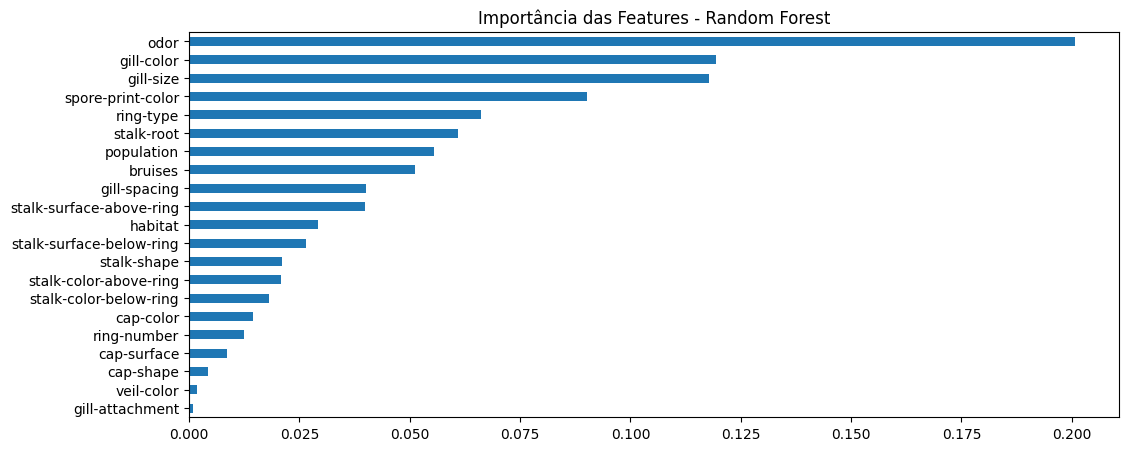

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(12,5))
plt.title("Importância das Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()


Essas são as variáveis que mais contribuem para o desempenho do modelo. Se for necessário por exemplo, podemos escolher apenas as 10 primeiras melhores características.

Essa análise poderia ser feita com qualquer outro modelo de características categóricas, estamos utilizando o Random Forest pois ele costuma ter um bom desempenho.




### 4. Aplicação das Técnicas de Aprendizado de Máquina


### 4.1) Modelagem

A escolha dos modelos **Árvore de Decisão, Random Forest** e **Naive Bayes** foi guiada pelas características do dataset, composto exclusivamente por variáveis categóricas e por ser um problema de classificação binária simples. Todos esses modelos funcionam com o Label Encoding, não precisam de regularização também, facilitando o fluxo do trabalho.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, model.score(X_test, y_test))

Decision Tree 1.0
Random Forest 1.0
Gaussian Naive Bayes 0.9159146841673503


#### 4.2) Métricas (Comparação dos Modelos)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, model in models.items():
    preds = model.predict(X_test)
    print("===== ", name, " =====")
    print("Acurácia:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))


=====  Decision Tree  =====
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

=====  Random Forest  =====
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

=====  Gaussian Naive Bayes  =====
Acurácia: 0.9159146841673503
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1263
           1       0.89      0.94      0.91      1175

    accuracy                      

Tanto o Decision Tree quanto o Random Forest tiveram todas as métricas 1.00, indicando que o modelo generalizou muito bem os dados. Já o Naive Bayes não desempenho tão bem quanto eles.

#### 4.3) Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

results = {}  # para guardar os arrays de scores

# Cabeçalho formatado
print(f"{'Modelo':25s} {'Acurácia Média':18s} {'Desvio-Padrão':18s} Folds")

# Loop dos modelos
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    mean = scores.mean()
    std = scores.std()
    folds = scores.tolist()

    # Guarda para o boxplot
    results[name] = scores

    # Impressão formatada
    print(f"{name:25s} {mean:<18.16f} {std:<18.16f} {folds}")


Modelo                    Acurácia Média     Desvio-Padrão      Folds
Decision Tree             0.9143002652519894 0.1212864548835214 [0.8818461538461538, 1.0, 1.0, 1.0, 0.6896551724137931]
Random Forest             0.9035908298597954 0.1293443250006686 [0.8424615384615385, 1.0, 1.0, 1.0, 0.6754926108374384]
Gaussian Naive Bayes      0.7259685486926866 0.1541581991656862 [0.7292307692307692, 0.9612307692307692, 0.7926153846153846, 0.6523076923076923, 0.4944581280788177]


O Desvio-Padrão está relativamente alto mas não aparenta ser um problema de overfitting. Eu suspeito que alguns folds ficaram com atributos mais importantes que outros.

Por exemplo, se a gente considerar que na análise de importância das variáveis tinham apenas 3 ou 4 características (de 21) muito impactantes no modelo, pode ser que elas não tenham ficado bem distribuídas. Um bom teste seria utilizar menos características focando nas mais importantes, mas isso levaria a repetir todo o processo até aqui.



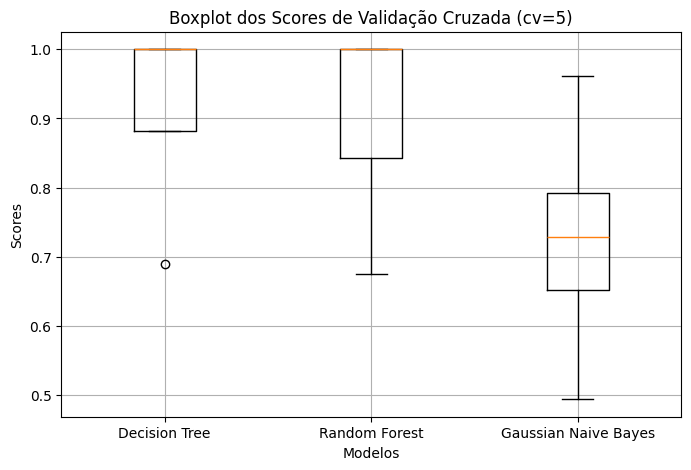

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(results.values(), tick_labels=results.keys())
plt.title("Boxplot dos Scores de Validação Cruzada (cv=5)")
plt.xlabel("Modelos")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

São poucos valores então a visualização está um pouco prejudicada mas vemos que:

Decision Tree:
*  O ultimo fold teve uma diferença muito grande em comparação aos demais e foi considerado um outlier;
*  Devido a baixa quantidade de amostras (5), o primeiro e segundo (mediana) quartil foram aglomerados.

Random Forest:
*   Mesmo cenário de aglomeração dos quartis 1 e 2;
*   Dessa vez sem outlier mas com tail.

Naive Bayes:
*   Distribuição dos valores bem grandes dentro desse intervalo.





### 5. Avaliação dos Resultados

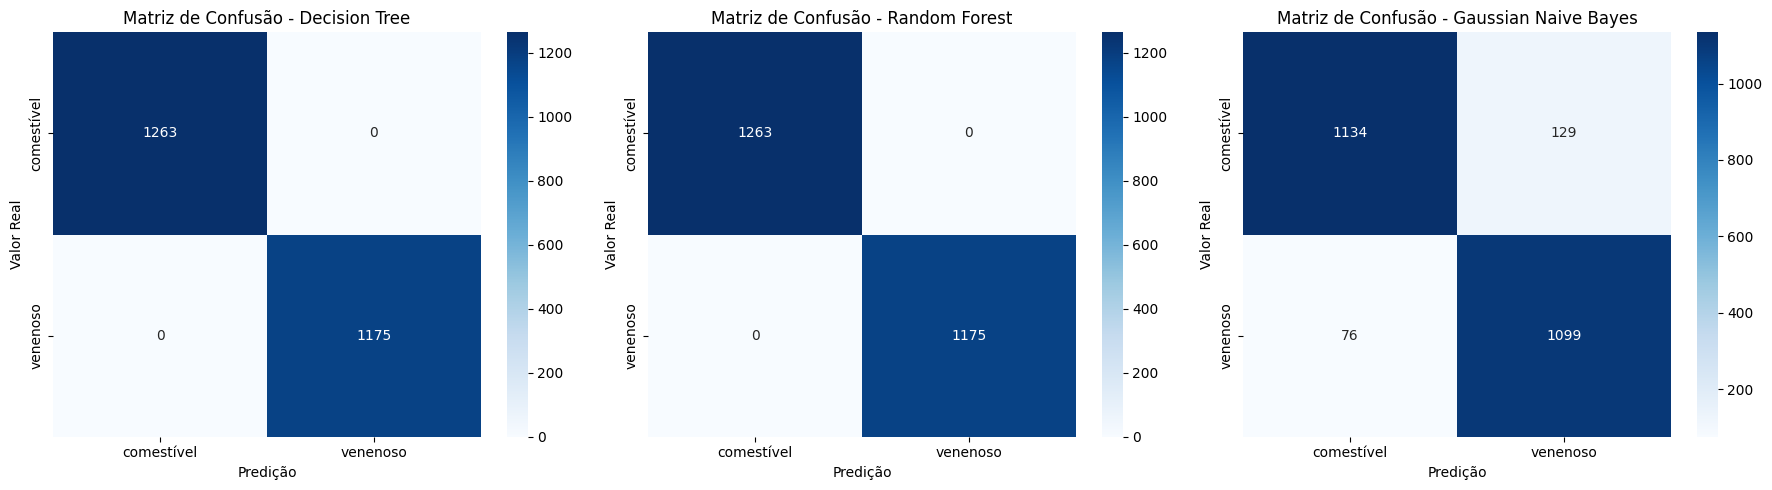

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

label_names = ["comestível", "venenoso"]

fig, axes = plt.subplots(1, len(models), figsize=(6 * len(models), 5))

# Normaliza caso haja apenas 1 modelo
if len(models) == 1:
    axes = [axes]

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names,
                yticklabels=label_names,
                ax=ax)

    ax.set_xlabel("Predição")
    ax.set_ylabel("Valor Real")
    ax.set_title("Matriz de Confusão - " + name)

plt.tight_layout()
plt.show()

Os modelos Decision Tree e Random Forest não erraram em nenhum caso. Já o Naive Bayes teve alguns casos falsos-positivos e falso-negativo.

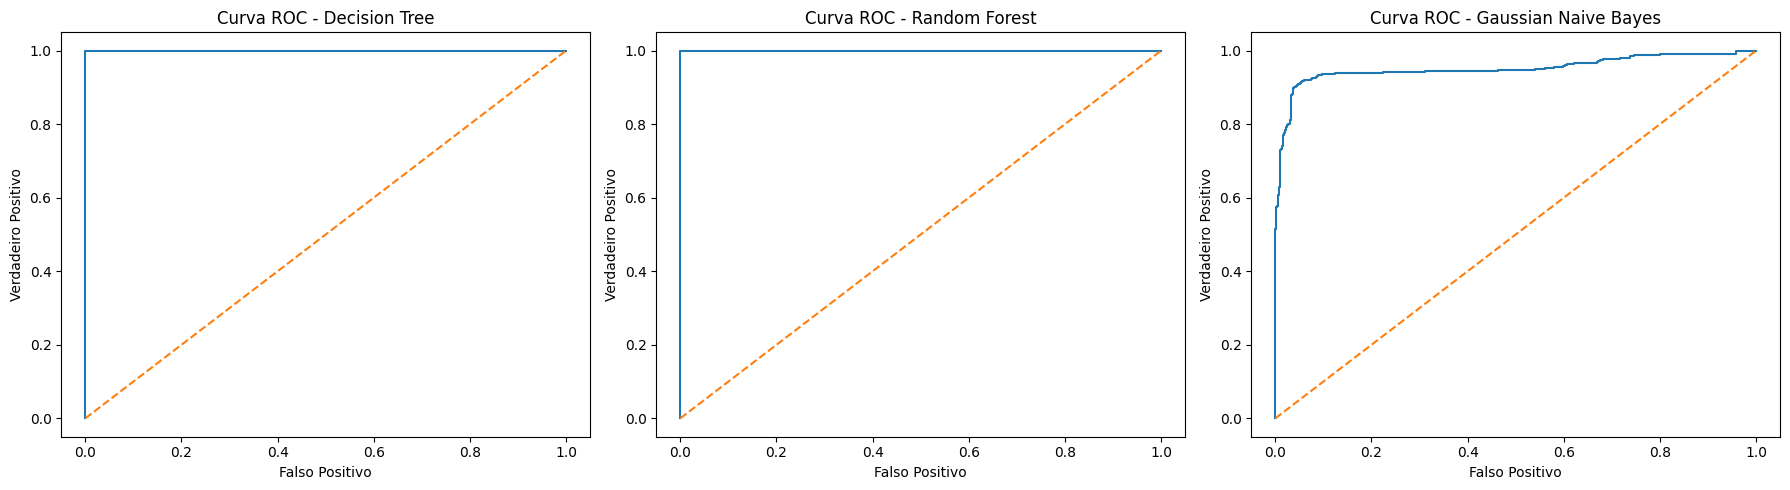

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(1, len(models), figsize=(6 * len(models), 5))

# Normaliza caso haja apenas 1 modelo
if len(models) == 1:
    axes = [axes]

for ax, (name, model) in zip(axes, models.items()):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], '--')
    ax.set_title("Curva ROC - " + name)
    ax.set_xlabel("Falso Positivo")
    ax.set_ylabel("Verdadeiro Positivo")

plt.tight_layout()
plt.show()


## Considerações Finais

O dataset é simples até de mais e não precisou de cuidados extras para alcançar bons resultados. Mas ainda assim foi uma experiência válida para demonstração das técnicas aprendidas no curso.

---

### Pontos de melhoria:
Poderia ter extendido na exploração do dataset e validado a teoria de que as características menos importantes impactaram a validação cruzada.